In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as t
from sklearn.datasets import make_regression

In [2]:
X,Y = make_regression(n_samples=1000,n_features=1,bias=True,noise=30)

In [3]:
X.shape

(1000, 1)

In [6]:
Y = Y.reshape(Y.shape[0],1)
Y.shape

(1000, 1)

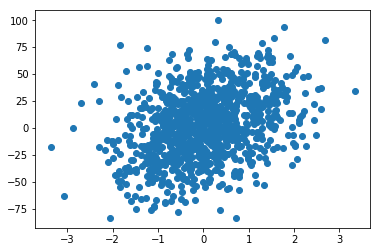

In [5]:
plt.scatter(X,Y)

Training time: 0.9325027465820312


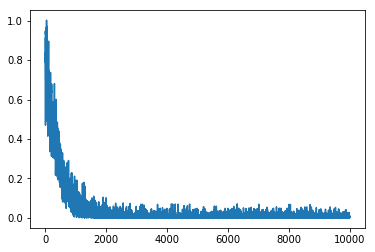

In [10]:
def BGDRegression(predictor,response,batch,epochs,eta):
    Xval = (predictor-predictor.min())/(predictor.max()-predictor.min())
    Yval = (response-response.min())/(response.max()-response.min())
    Phi = np.hstack((np.ones((Xval.shape[0],1)),Xval))
    w = np.random.randn(Phi.shape[1],1)
    Losses = np.empty(epochs)
    for i in range(epochs):
        sample = np.random.choice(np.arange(Phi.shape[0],step=1),size=batch,replace=False)
        phi = Phi[sample]
        y = Yval[sample]
        Loss = (phi@w-y).T@(phi@w-y)
        #print("iteration: {} current loss:{}".format(i+1,Loss))
        Losses[i]=Loss
        w-=eta*phi.T@(phi@w-y)
    plt.plot(Losses) 
    return

start = t.time()
BGDRegression(X,Y,1,10000,1e-3)
print('Training time: {}'.format(t.time()-start))